In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [4]:
dataset = pd.read_csv(r'/content/drive/MyDrive/regression/Ice Cream.csv')

In [5]:
dataset.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [8]:
x = dataset["Temperature"].values.reshape(-1, 1)
y = dataset["Revenue"].values.reshape(-1, 1)
print("shape: ", x.shape, y.shape)

shape:  (500, 1) (500, 1)


Text(0, 0.5, 'Revenue')

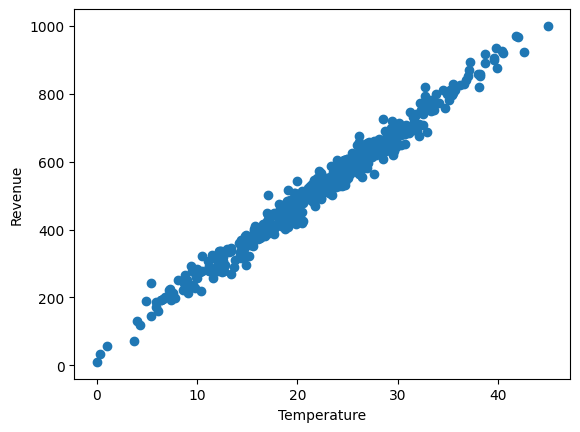

In [9]:
plt.scatter(x, y)
plt.xlabel("Temperature")
plt.ylabel("Revenue")

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(x_train.shape[0]/500, x_test.shape[0]/500 )

0.75 0.25


Text(0, 0.5, 'predicted values')

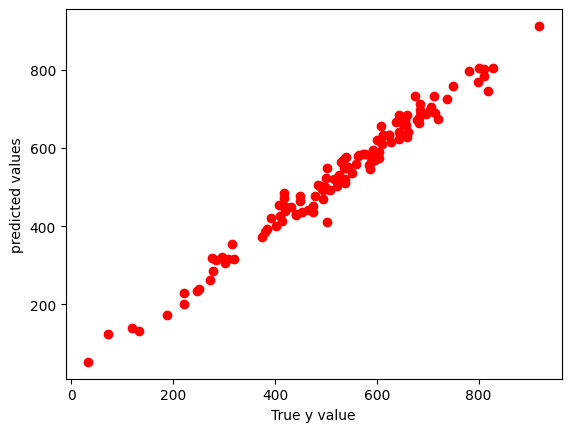

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
plt.scatter(y_test, y_pred, c='red')
plt.xlabel('True y value')
plt.ylabel('predicted values')

In [14]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)

print('R2 Score: ', r2)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

R2 Score:  0.9775975523219221
Mean Squared Error:  616.8140460213498
Root Mean Squared Error:  24.835741302029817
Mean Absolute Error:  19.090303939179492


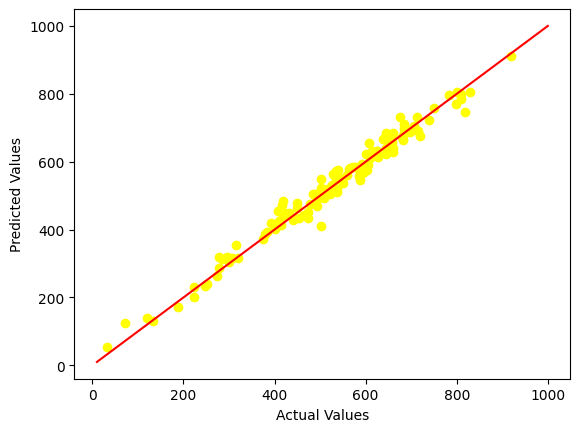

In [16]:
plt.scatter(y_test, y_pred, c='yellow')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='red')
plt.show()

Text(0, 0.5, 'Predicted Values')

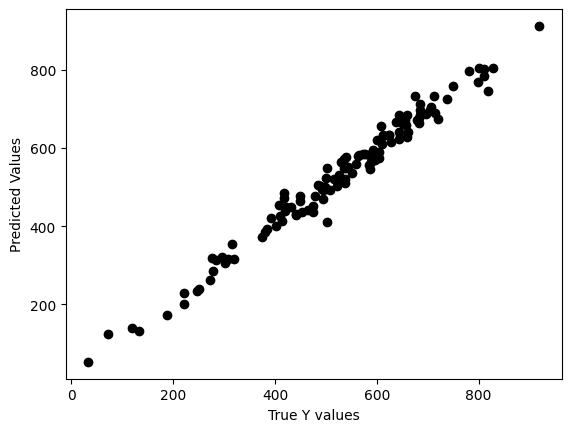

In [22]:
model = Lasso(alpha=0.1)
model.fit(x_train, y_train)

y_pred2 = model.predict(x_test)
plt.scatter(y_test, y_pred2, c='black')
plt.xlabel('True Y values')
plt.ylabel('Predicted Values')

In [23]:
r2_2 = r2_score(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = sqrt(mse)

print('R2 Score: ', r2)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

R2 Score:  0.9775975523219221
Mean Squared Error:  616.8140460213498
Root Mean Squared Error:  24.835741302029817
Mean Absolute Error:  19.090303939179492


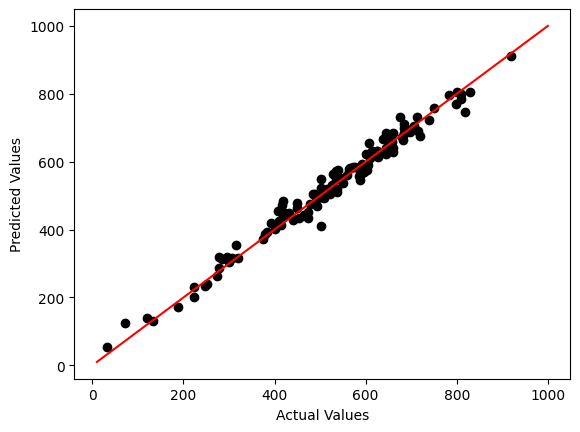

In [24]:
plt.scatter(y_test, y_pred2, c='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='red')
plt.show()

Text(0, 0.5, 'Predicted Values')

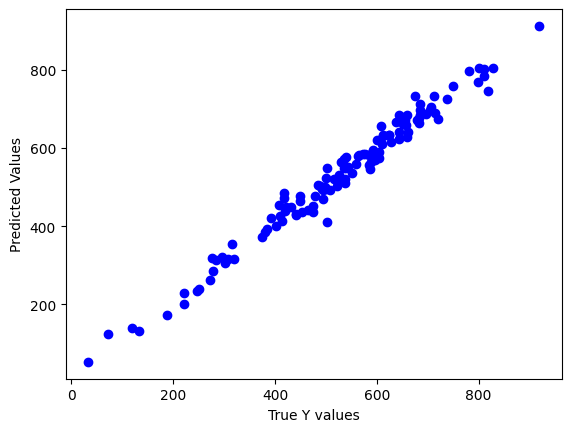

In [27]:
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

y_pred3 = model.predict(x_test)
plt.scatter(y_test, y_pred3, c='blue')
plt.xlabel('True Y values')
plt.ylabel('Predicted Values')

In [28]:
r2_3 = r2_score(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
mae3 = mean_absolute_error(y_test, y_pred3)
rmse3 = sqrt(mse)

print('R2 Score: ', r2)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

R2 Score:  0.9775975523219221
Mean Squared Error:  616.8140460213498
Root Mean Squared Error:  24.835741302029817
Mean Absolute Error:  19.090303939179492


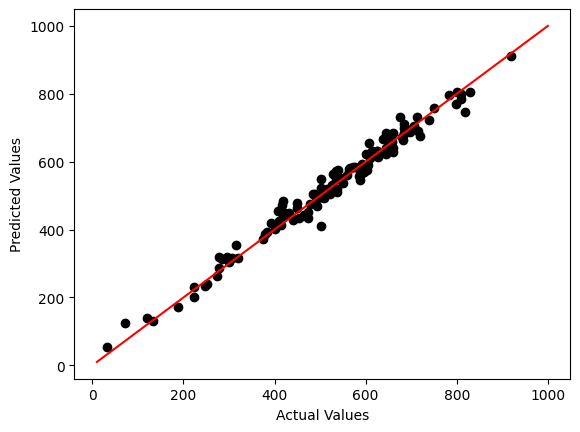

In [30]:
plt.scatter(y_test, y_pred3, c='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='red')
plt.show()

Text(0, 0.5, 'predicted values')

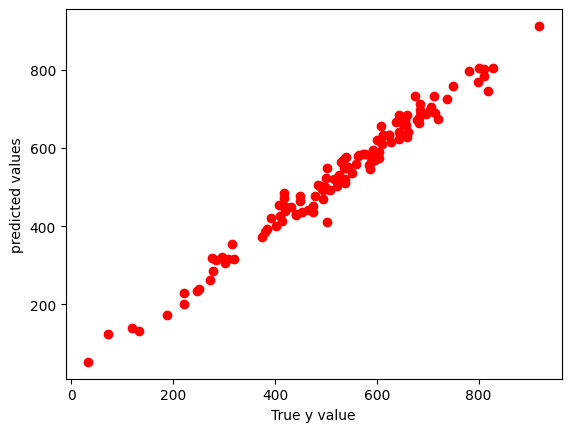

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = lr.predict(x_test)
plt.scatter(y_test, y_pred, c='red')
plt.xlabel('True y value')
plt.ylabel('predicted values')

In [32]:
print('Weight coeficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coeficients:  [[21.37601787]]
y-axis intercept:  [46.29834309]


In [34]:
model.score(x_test, y_test)

0.9775975523219221

In [35]:
temp = np.array([row[0] for row in x]).reshape(-1, 1)
x_min = np.array([[temp.min()]])
x_max = np.array([[temp.max()]])
print(f"Min x Value: {x_min}")
print(f"Max x Value: {x_max}")

Min x Value: [[0.]]
Max x Value: [[45.]]


In [36]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)
print(f"Min y Value: {y_min}")
print(f"Max y Value: {y_max}")

Min y Value: [[46.29834309]]
Max y Value: [[1008.21914743]]


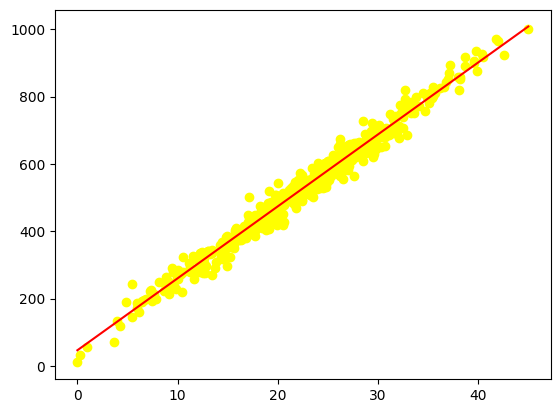

In [37]:
plt.scatter(temp, y, c='yellow')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [38]:
metricsTable = pd.DataFrame({"Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"], "R2 Score": [r2, r2_2, r2_3], "Mean Squared Error": [mse, mse2, mse3], "Mean Absolute Error": [mae, mae2, mae3], "Root Mean Squared Error": [rmse, rmse2, rmse3]})
metricsTable

,Model,R2 Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
0,Linear Regression,0.977598,616.814046,19.090304,24.835741
1,Lasso Regression,0.977596,616.864095,19.090738,24.835741
2,Ridge Regression,0.977597,616.842544,19.090551,24.835741
